##### package imports

In [1]:
import networkx as nx
import numpy as np
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
import math
import pandas as pd
import matplotlib.pyplot as plt

### Problem 1.1

##### Generate the undirected weighted graphs G_er and G_pl

In [2]:
G_er = nx.erdos_renyi_graph(1000, 0.1)
G_pl = nx.barabasi_albert_graph(1000, 5) 

### Problem 1.2

##### Implement discrete-time SIS model

In [3]:
G = G_er
beta = .2
Lambda = .2
infected = 1
max_time = 500

In [4]:
# SIS
sis_model = ep.SISModel(G)
config = mc.Configuration()
config.add_model_parameter('beta', beta)
config.add_model_parameter('lambda', Lambda)
config.add_model_parameter("fraction_infected", infected)
sis_model.set_initial_status(config)

In [5]:
# Simulation
iterations = sis_model.iteration_bunch(max_time)
trends = sis_model.build_trends(iterations)

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:10<00:00, 53.82it/s]


### Problem 1.3
##### Implement ACC and RAND Policies

In [6]:
K_budget = 50

In [7]:
### ACC Policy for G_er

nodes = G_er.nodes
immunized = []

### in this loop, we randomly (uniformly) select a beginning node to immunize, and then randomly immunize
### their neighbors, up to the K_budget

for i in range(K_budget):   
    
    first_node = int(np.random.choice(nodes, 1))
    neighbors = list(G_er.neighbors(first_node))    
    random_neighbor = int(np.random.choice(neighbors, 1))
    
    while random_neighbor in immunized:
        random_neighbor = int(np.random.choice(neighbors, 1))
    
    immunized.append(random_neighbor)
    
print(immunized)

G_er_ACC = G_er.copy()
G_er_ACC.remove_nodes_from(immunized)

print(len(G_er_ACC))

###
###
###


[540, 756, 293, 678, 2, 4, 208, 878, 28, 317, 925, 168, 203, 941, 761, 313, 380, 422, 671, 444, 298, 279, 926, 599, 201, 308, 134, 519, 817, 204, 885, 143, 816, 616, 67, 357, 526, 611, 607, 658, 986, 681, 724, 849, 523, 469, 891, 605, 583, 12]
950


In [8]:
### ACC Policy for G_pl

nodes = G_pl.nodes
immunized = []

for i in range(K_budget):   
    
    first_node = int(np.random.choice(nodes, 1))
    neighbors = list(G_pl.neighbors(first_node))    
    random_neighbor = int(np.random.choice(neighbors, 1))
    
    while random_neighbor in immunized:
        random_neighbor = int(np.random.choice(neighbors, 1))
    
    immunized.append(random_neighbor)
    
print(immunized)

G_pl_ACC = G_pl.copy()
G_pl_ACC.remove_nodes_from(immunized)

print(len(G_pl_ACC))

###
###
###

[495, 5, 36, 53, 526, 11, 640, 444, 94, 15, 0, 69, 21, 192, 454, 305, 541, 649, 290, 85, 108, 496, 8, 884, 77, 130, 989, 138, 99, 135, 30, 29, 594, 180, 408, 41, 738, 935, 93, 387, 14, 752, 27, 901, 57, 702, 203, 35, 709, 783]
950


In [9]:
### Rand Policy for G_er 

nodes = G_er.nodes
nodes_to_remove = np.random.choice(nodes, K_budget, replace = False)

print(nodes_to_remove.tolist())

G_er_RAND = G_er.copy()
G_er_RAND.remove_nodes_from(nodes_to_remove)

[730, 388, 711, 828, 920, 627, 422, 363, 381, 930, 377, 452, 578, 867, 873, 423, 604, 752, 637, 774, 152, 971, 484, 291, 87, 858, 559, 395, 317, 778, 1, 132, 551, 349, 933, 934, 455, 793, 195, 946, 872, 140, 389, 705, 234, 46, 534, 642, 31, 435]


In [10]:
### Rand Policy for G_pl

nodes = G_pl.nodes
nodes_to_remove = np.random.choice(nodes, K_budget, replace = False)

print(nodes_to_remove.tolist())

G_pl_RAND = G_pl.copy()
G_pl_RAND.remove_nodes_from(nodes_to_remove)

[156, 472, 644, 655, 727, 668, 855, 417, 136, 9, 493, 401, 994, 162, 352, 538, 870, 978, 431, 530, 349, 324, 411, 906, 116, 666, 847, 155, 581, 433, 857, 382, 404, 122, 587, 307, 584, 256, 118, 641, 762, 824, 434, 601, 492, 730, 582, 605, 325, 614]


### Problem 1.4

##### Run SIS Model with beta = lambda = 0.2 on G_er and G_pl with K = 50

In [11]:
#G_er Graph with ALL Nodes

G_er_1000_iterations = []
for i in range(15):
    
    model = ep.SISModel(G_er)   
    
    # Model Configuration
    cfg = mc.Configuration()
    cfg.add_model_parameter('beta', 0.2)
    cfg.add_model_parameter('lambda', 0.2)
    cfg.add_model_parameter("fraction_infected", 1)
    model.set_initial_status(cfg)
    
    iterations = model.iteration_bunch(500)
    G_er_1000_iterations.append(iterations)

###
###
###


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:12<00:00, 39.65it/s]


In [12]:
#G_er Graph, ACC Policy, with 950 Nodes (immunized removed)

G_er_ACC_iterations = []
for i in range(15):
    
    model = ep.SISModel(G_er_ACC)   
    
    # Model Configuration
    cfg = mc.Configuration()
    cfg.add_model_parameter('beta', 0.2)
    cfg.add_model_parameter('lambda', 0.2)
    cfg.add_model_parameter("fraction_infected", 1)
    model.set_initial_status(cfg)
    
    iterations = model.iteration_bunch(500)
    G_er_ACC_iterations.append(iterations)

###
###
###

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:10<00:00, 49.32it/s]


In [13]:
#G_er Graph, RAND Policy, with 950 Nodes (immunized removed)

G_er_RAND_iterations = []
for i in range(15):
    
    model = ep.SISModel(G_er_RAND)   
    
    # Model Configuration
    cfg = mc.Configuration()
    cfg.add_model_parameter('beta', 0.2)
    cfg.add_model_parameter('lambda', 0.2)
    cfg.add_model_parameter("fraction_infected", 1)
    model.set_initial_status(cfg)
    
    iterations = model.iteration_bunch(500)
    G_er_RAND_iterations.append(iterations)

###
###
###


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:12<00:00, 39.19it/s]


In [14]:
#G_pl Graph with ALL Nodes

G_pl_1000_iterations = []
for i in range(15):
    
    model = ep.SISModel(G_pl)   
    
    # Model Configuration
    cfg = mc.Configuration()
    cfg.add_model_parameter('beta', 0.2)
    cfg.add_model_parameter('lambda', 0.2)
    cfg.add_model_parameter("fraction_infected", 1)
    model.set_initial_status(cfg)
    
    iterations = model.iteration_bunch(500)
    G_pl_1000_iterations.append(iterations)

###
###
###


100%|███████████████████████████████████████████████████████████████████████████████| 500/500 [00:03<00:00, 139.30it/s]


In [15]:
#G_pl Graph, ACC Policy, with 950 Nodes (immunized removed)

G_pl_ACC_iterations = []
for i in range(15):
    
    model = ep.SISModel(G_pl_ACC)   
    
    # Model Configuration
    cfg = mc.Configuration()
    cfg.add_model_parameter('beta', 0.2)
    cfg.add_model_parameter('lambda', 0.2)
    cfg.add_model_parameter("fraction_infected", 1)
    model.set_initial_status(cfg)
    
    iterations = model.iteration_bunch(500)
    G_pl_ACC_iterations.append(iterations)

###
###
###

100%|███████████████████████████████████████████████████████████████████████████████| 500/500 [00:03<00:00, 136.02it/s]


In [16]:
#G_pl Graph, RAND Policy, with 950 Nodes (immunized removed)

G_pl_RAND_iterations = []
for i in range(15):
    
    model = ep.SISModel(G_pl_RAND)   
    
    # Model Configuration
    cfg = mc.Configuration()
    cfg.add_model_parameter('beta', 0.2)
    cfg.add_model_parameter('lambda', 0.2)
    cfg.add_model_parameter("fraction_infected", 1)
    model.set_initial_status(cfg)
    
    iterations = model.iteration_bunch(500)
    G_pl_RAND_iterations.append(iterations)

###
###
###


100%|███████████████████████████████████████████████████████████████████████████████| 500/500 [00:03<00:00, 133.47it/s]


##### dictionaries for the 6 models

[1000.0, 802.3333333333334, 839.9333333333333, 833.7333333333333, 835.6]

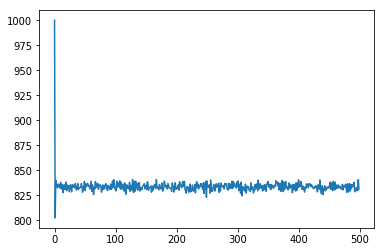

In [17]:
### Dict for G_er_1000
model_dict = {}
model_dict = {dict_list: [] for dict_list in range(500)} 

for each in G_er_1000_iterations:
    for i in range(500):  
        model_dict[i].append((each[i]["node_count"][1]))
        
for each in model_dict:
    model_dict[each] = np.mean(model_dict[each])
    
time_steps = list(model_dict.keys())
G_er_1000_infected = list(model_dict.values())

plt.plot(time_steps,G_er_1000_infected)
G_er_1000_infected[0:5]

###
###
###

[950.0, 758.4, 802.3333333333334, 785.4666666666667, 795.8]

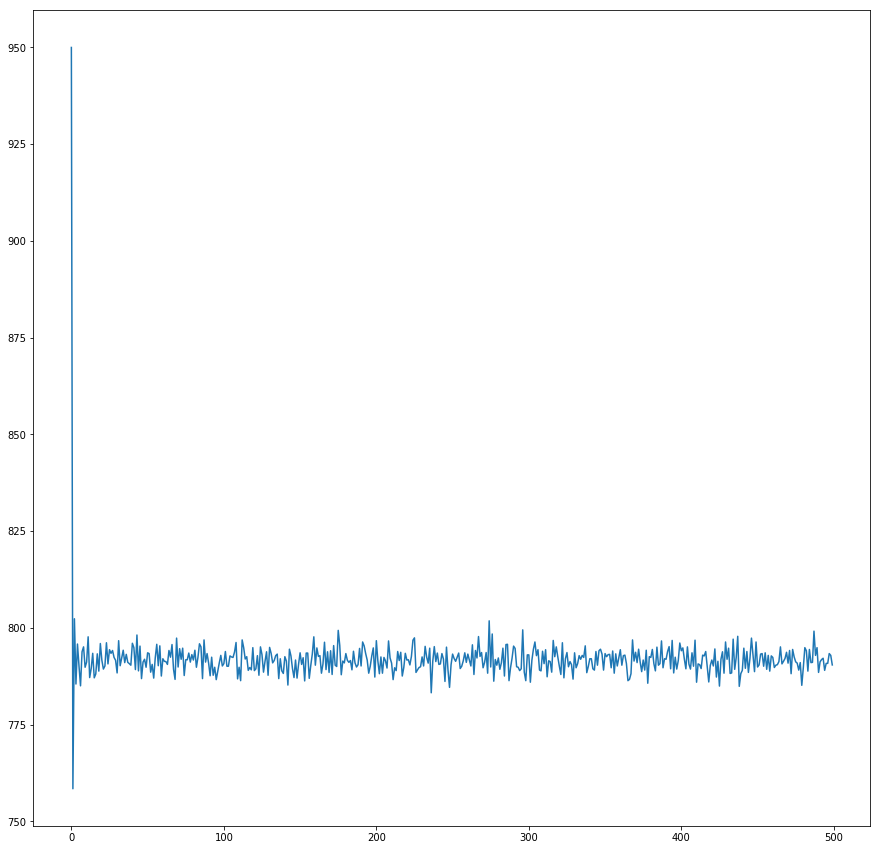

In [29]:
### Dict for G_er_ACC
model_dict = {}
model_dict = {dict_list: [] for dict_list in range(500)} 

for each in G_er_ACC_iterations:
    for i in range(500):  
        model_dict[i].append((each[i]["node_count"][1]))
        
for each in model_dict:
    model_dict[each] = np.mean(model_dict[each])
    
time_steps = list(model_dict.keys())
G_er_ACC_infected = list(model_dict.values())

plt.plot(time_steps,G_er_ACC_infected)
G_er_ACC_infected[0:5]

###
###
###


[950.0, 762.1333333333333, 799.0666666666667, 790.4666666666667, 789.0]

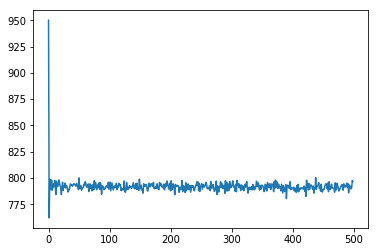

In [19]:
### Dict for G_er_RAND
model_dict = {}
model_dict = {dict_list: [] for dict_list in range(500)} 

for each in G_er_RAND_iterations:
    for i in range(500):  
        model_dict[i].append((each[i]["node_count"][1]))
        
for each in model_dict:
    model_dict[each] = np.mean(model_dict[each])
    
time_steps = list(model_dict.keys())
G_er_RAND_infected = list(model_dict.values())

plt.plot(time_steps,G_er_RAND_infected)
G_er_RAND_infected[0:5]

###
###
###


[1000.0,
 800.2666666666667,
 784.5333333333333,
 784.3333333333334,
 779.9333333333333]

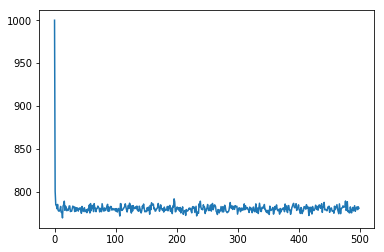

In [20]:
### Dict for G_pl_1000
model_dict = {}
model_dict = {dict_list: [] for dict_list in range(500)} 

for each in G_pl_1000_iterations:
    for i in range(500):  
        model_dict[i].append((each[i]["node_count"][1]))
        
for each in model_dict:
    model_dict[each] = np.mean(model_dict[each])
    
time_steps = list(model_dict.keys())
G_pl_1000_infected = list(model_dict.values())

plt.plot(time_steps,G_pl_1000_infected)
G_pl_1000_infected[0:5]

###
###
###


[950.0, 767.4, 744.2, 726.6666666666666, 725.1333333333333]

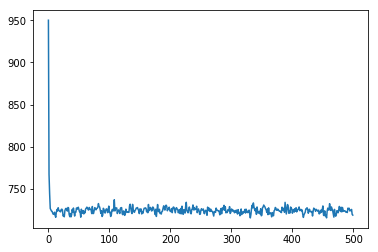

In [21]:
### Dict for G_pl_ACC
model_dict = {}
model_dict = {dict_list: [] for dict_list in range(500)} 

for each in G_pl_ACC_iterations:
    for i in range(500):  
        model_dict[i].append((each[i]["node_count"][1]))
        
for each in model_dict:
    model_dict[each] = np.mean(model_dict[each])
    
time_steps = list(model_dict.keys())
G_pl_ACC_infected = list(model_dict.values())

plt.plot(time_steps,G_pl_ACC_infected)
G_pl_ACC_infected[0:5]

###
###
###


[950.0, 757.4666666666667, 741.4666666666667, 731.1333333333333, 740.8]

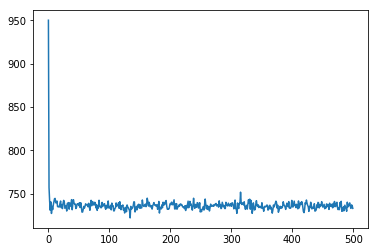

In [22]:
### Dict for G_pl_RAND
model_dict = {}
model_dict = {dict_list: [] for dict_list in range(500)} 

for each in G_pl_RAND_iterations:
    for i in range(500):  
        model_dict[i].append((each[i]["node_count"][1]))
        
for each in model_dict:
    model_dict[each] = np.mean(model_dict[each])
    
time_steps = list(model_dict.keys())
G_pl_RAND_infected = list(model_dict.values())

plt.plot(time_steps,G_pl_RAND_infected)
G_pl_RAND_infected[0:5]

###
###
###


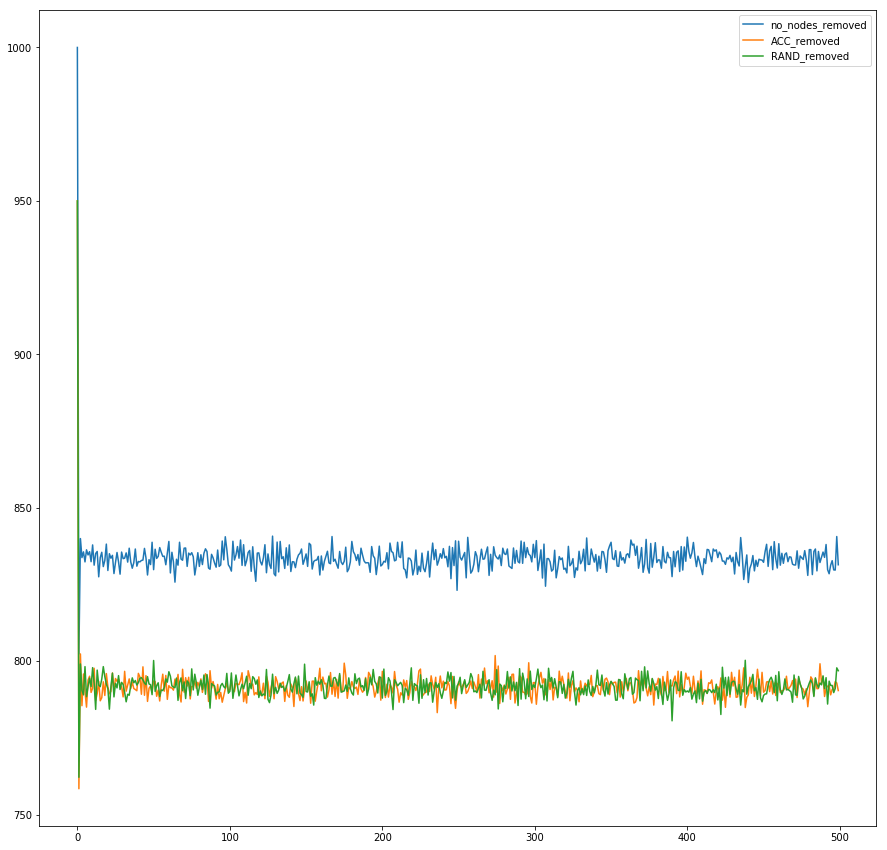

In [28]:
### PLOT for Erdos-Renyi
line_dict = {}
line_dict['no_nodes_removed'] = [time_steps, G_er_1000_infected]
line_dict['ACC_removed'] = [time_steps, G_er_ACC_infected]
line_dict['RAND_removed'] = [time_steps, G_er_RAND_infected]

for kind in line_dict:
    x = line_dict[kind][0]
    y = line_dict[kind][1]
    plt.plot(x,y, label = kind)

plt.rcParams["figure.figsize"] = (15,15)
plt.legend(loc = "upper right")

###
###
###


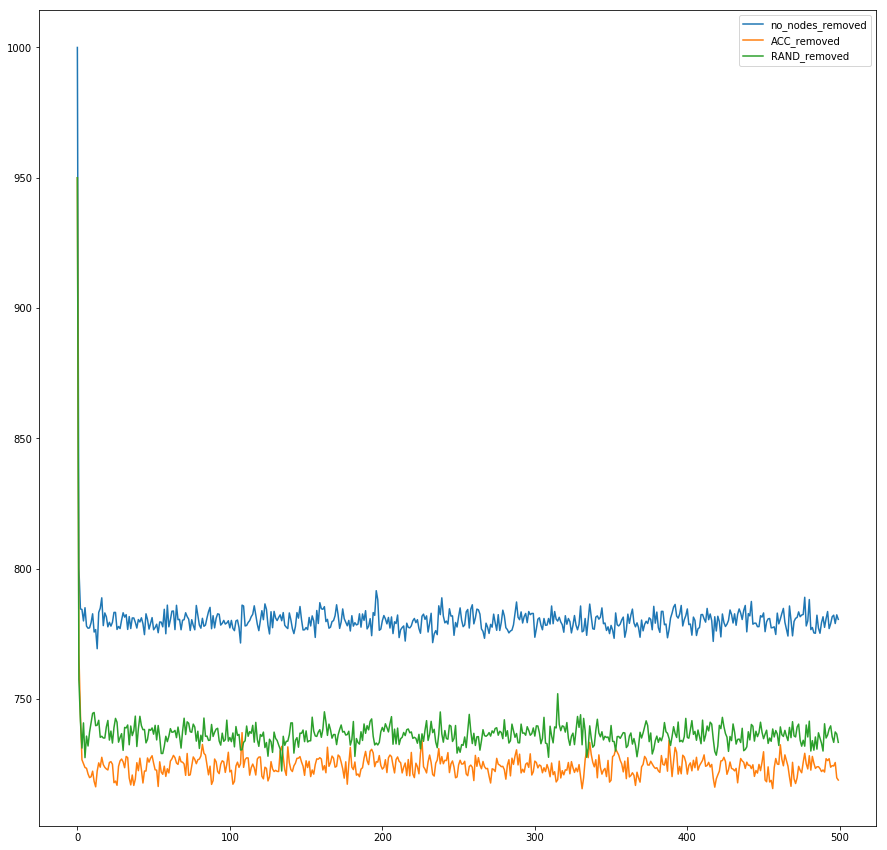

In [24]:
### PLOT for Barabasi
line_dict = {}
line_dict['no_nodes_removed'] = [time_steps, G_pl_1000_infected]
line_dict['ACC_removed'] = [time_steps, G_pl_ACC_infected]
line_dict['RAND_removed'] = [time_steps, G_pl_RAND_infected]

for kind in line_dict:
    x = line_dict[kind][0]
    y = line_dict[kind][1]
    plt.plot(x,y, label = kind)

plt.legend(loc = "upper right")
plt.rcParams["figure.figsize"] = (15,15)

###
###
###


### Problem 1.5

##### See Overleaf Document

### Problem 1.6

##### Degree Distribution

In [25]:
set_difference = set(G_er) - set(G_er_ACC)
G_er_ACC_Immunized = list(set_difference)

set_difference = set(G_er) - set(G_er_RAND)
G_er_RAND_Immunized = list(set_difference)

set_difference = set(G_pl) - set(G_pl_ACC)
G_pl_ACC_Immunized = list(set_difference)

set_difference = set(G_pl) - set(G_pl_RAND)
G_pl_RAND_Immunized = list(set_difference)

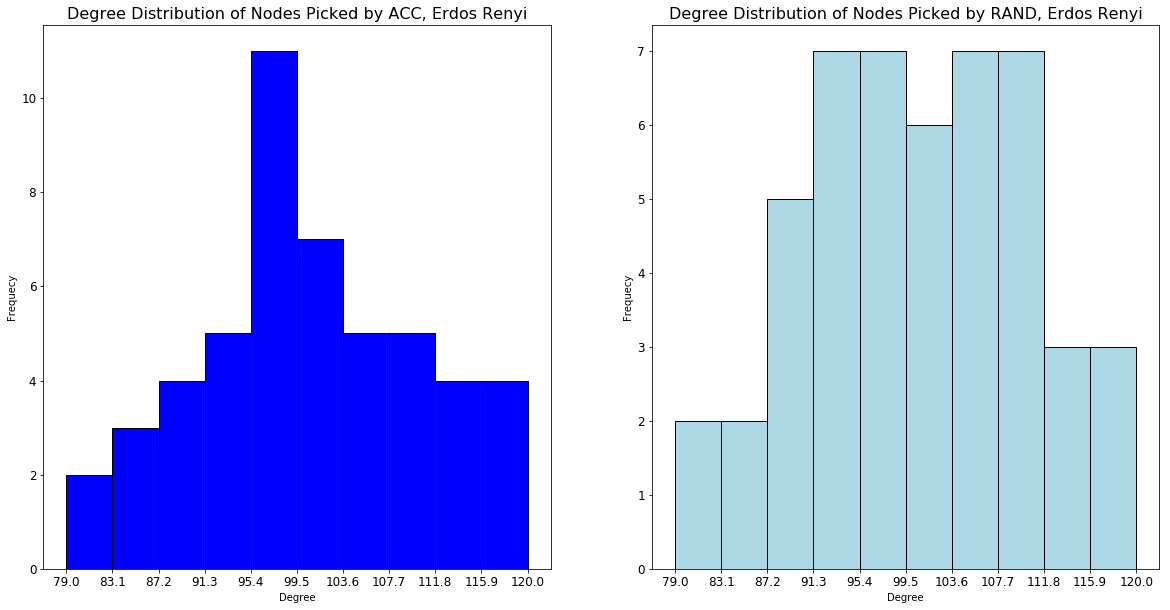

In [26]:
### Erdos Renyi Histograms

figure, axis = plt.subplots(1,2,figsize=(20,10))

degrees_mapping = dict(G_er.degree(G_er_ACC_Immunized))
degrees = list(degrees_mapping.values())
counts, bins = np.histogram(degrees)

axis[0].hist(degrees, bins = bins, color = 'blue', ec = 'black')
axis[0].set_title("Degree Distribution of Nodes Picked by ACC, Erdos Renyi", fontsize = 16)
axis[0].tick_params(labelsize = 12)
axis[0].set_xticks(bins)



degrees_mapping = dict(G_er.degree(G_er_RAND_Immunized))
degrees = list(degrees_mapping.values())
#counts, bins = np.histogram(degrees)

axis[1].hist(degrees, bins = bins, color = 'lightblue', ec = 'black')
axis[1].set_title("Degree Distribution of Nodes Picked by RAND, Erdos Renyi", fontsize = 16)
axis[1].tick_params(labelsize = 12)
axis[1].set_xticks(bins)

for ax in axis.flat:
    ax.set(xlabel = 'Degree', ylabel = 'Frequecy')
    
parameters = {'axes.labelsize': 14}
plt.rcParams.update(parameters)

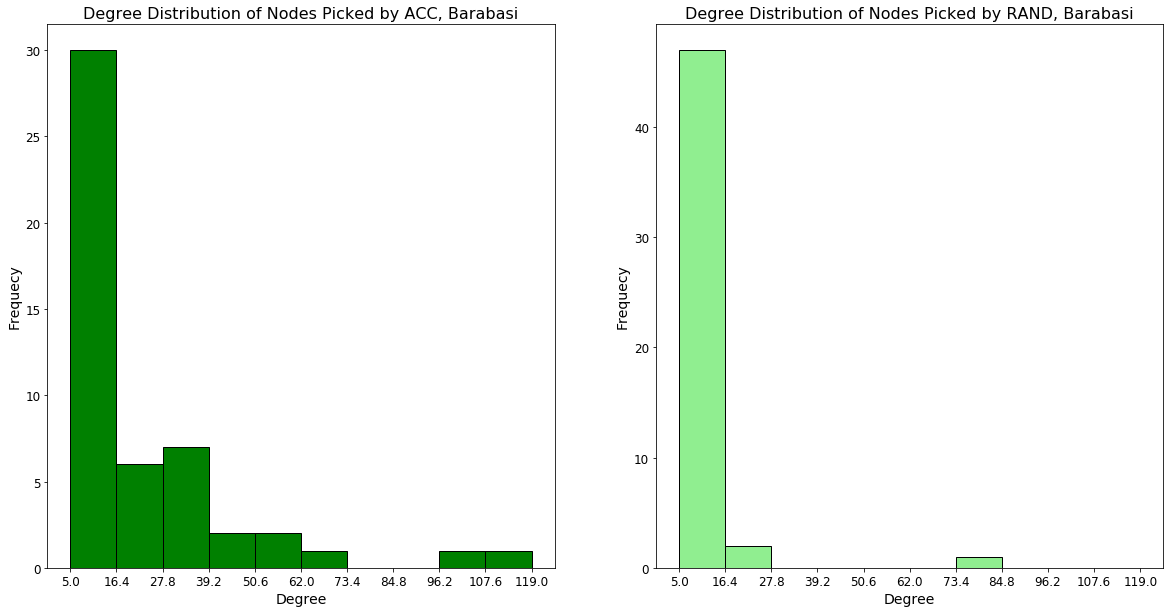

In [27]:
### Barabasi Histograms

figure, axis = plt.subplots(1,2,figsize=(20,10))

degrees_mapping = dict(G_pl.degree(G_pl_ACC_Immunized))
degrees = list(degrees_mapping.values())
counts, bins = np.histogram(degrees)

axis[0].hist(degrees, bins = bins, color = 'green', ec = 'black')
axis[0].set_title("Degree Distribution of Nodes Picked by ACC, Barabasi", fontsize = 16)
axis[0].tick_params(labelsize = 12)
axis[0].set_xticks(bins)



degrees_mapping = dict(G_pl.degree(G_pl_RAND_Immunized))
degrees = list(degrees_mapping.values())
#counts, bins = np.histogram(degrees)

axis[1].hist(degrees, bins = bins, color = 'lightgreen', ec = 'black')
axis[1].set_title("Degree Distribution of Nodes Picked by RAND, Barabasi", fontsize = 16)
axis[1].tick_params(labelsize = 12)
axis[1].set_xticks(bins)

for ax in axis.flat:
    ax.set(xlabel = 'Degree', ylabel = 'Frequecy')
    
parameters = {'axes.labelsize': 14}
plt.rcParams.update(parameters)

### Problem 2.1

##### ARIMA modeling

In [2]:
from pandas import datetime
from matplotlib import pyplot
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import numpy as np

<ipython-input-2-f5b5c6420057>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [1]:
from platform import python_version

print(python_version())

3.8.3


In [3]:
df = pd.read_csv('C:/Users/Clayton/Downloads/covid-data-us-national.csv')

df_list = []
for i in range(3,9):
    df_list.append(df[df.date.str.contains("2020/" + str(i) + "/*")])
    

training_df = pd.concat(df_list)
training_df['date'] = pd.to_datetime(training_df['date'])
series = training_df[["date","death_jhu_incidence"]]

history = series['death_jhu_incidence'].tolist()
#history = [float(i) for i in history]
print(history)

testing_df = df[df.date.str.contains("2020/9/*")]
test = testing_df["death_jhu_incidence"].tolist()
training_df
len(history)

[16, 41, 406, 2422, 7957, 14645, 15042, 15423, 13542, 12286, 9975, 8541, 6629, 6128, 5216, 4240, 3938, 3641, 5236, 5451, 6408, 7978, 7257, 7044, 6863, 6388]


26

##### ARIMA 202

In [4]:
model = ARIMA(history, order=(2,0,2))
model_fit = model.fit()

In [5]:
predictions = []
arima_train_error = 0
for t in range(len(test)):

    model = ARIMA(history, order=(2,0,2))
    model_fit = model.fit()
    
    if t == 0:
        arima_train_error = (model_fit.mse)**(1/2)

    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(yhat)
    print('predicted=%f, expected=%f' % (yhat, obs))
    
arima_error = mean_squared_error(test, predictions)
arima_error = arima_error ** (1/2)
print('Test RMSE: %.3f' % arima_error)
print('Train RMSE: %.3f' % arima_train_error)

predicted=6548.350789, expected=5838.000000


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=7130.778282, expected=5141.000000


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=7780.435829, expected=5589.000000
predicted=8297.153738, expected=5208.000000
Test RMSE: 2168.472
Train RMSE: 1852.128


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### Problem 2.2

##### OLS

In [6]:
train_data = training_df[["mobility","totalTests","covid_cases"]].values.tolist()
train_labels = training_df["death_jhu_incidence"].tolist()
train_data = sm.add_constant(train_data)
train_data

array([[1.000000e+00, 8.318900e+02, 4.132000e+03, 3.580000e+02],
       [1.000000e+00, 7.619700e+02, 3.188400e+04, 2.470000e+03],
       [1.000000e+00, 5.169800e+02, 2.016860e+05, 2.163000e+04],
       [1.000000e+00, 3.845300e+02, 5.766200e+05, 9.943800e+04],
       [1.000000e+00, 3.744300e+02, 9.187680e+05, 1.885590e+05],
       [1.000000e+00, 3.856800e+02, 1.052745e+06, 2.185810e+05],
       [1.000000e+00, 4.146200e+02, 1.065018e+06, 2.011560e+05],
       [1.000000e+00, 4.666500e+02, 1.520506e+06, 2.119990e+05],
       [1.000000e+00, 5.168400e+02, 1.672828e+06, 1.949390e+05],
       [1.000000e+00, 5.831400e+02, 1.936914e+06, 1.773110e+05],
       [1.000000e+00, 4.702100e+02, 2.436105e+06, 1.582410e+05],
       [1.000000e+00, 7.291300e+02, 2.876003e+06, 1.566880e+05],
       [1.000000e+00, 7.658000e+02, 2.813417e+06, 1.472280e+05],
       [1.000000e+00, 8.089700e+02, 3.341809e+06, 1.561500e+05],
       [1.000000e+00, 8.767700e+02, 3.286934e+06, 1.525090e+05],
       [1.000000e+00, 9.2

In [7]:
mod = sm.OLS(train_labels, train_data)
res = mod.fit()
res.summary()

ols_training_error = np.mean([residual**2 for residual in res.resid])
ols_training_error = (ols_training_error)**(1/2)

test_data = testing_df[["mobility","totalTests","covid_cases"]].values.tolist()
test_data = sm.add_constant(test_data)
test_labels = testing_df["death_jhu_incidence"].tolist()

guesses = res.predict(test_data)
print(guesses)

ols_error = mean_squared_error(test_labels, guesses)
ols_error = ols_error**(1/2)
print('Test RMSE: %.3f' % ols_error)
print('Train RMSE: %.3f' % ols_training_error)

[6252.69882283 5607.13171407 6939.70047665 8903.9048041 ]
Test RMSE: 1992.069
Train RMSE: 2864.672


### Problem 2.3

##### EM1

In [9]:
ols_pred = np.asarray(guesses)
arima_pred = np.asarray(predictions).flatten()

em1 = (ols_pred + arima_pred)/2
print(em1)

error = mean_squared_error(test_labels, em1)
print('EM1 RMSE: %.3f' % error**(1/2))

[6400.52480601 6368.95499786 7360.06815299 8600.52927084]
EM1 RMSE: 2029.177


### Problem 2.4

##### EM2

In [11]:
em2 = ((arima_pred * (1/arima_train_error) + (ols_pred * (1/ols_training_error))))/((1/arima_train_error) + (1/ols_training_error))
print(em2)

error = mean_squared_error(test_labels, em2)
print('EM2 RMSE: %.3f' % error**(1/2))

[6432.25824724 6532.4937336  7450.307451   8535.40438923]
EM2 RMSE: 2050.944
